In [16]:
# 随机选择4000条评论
import pandas as pd
data=pd.read_csv('train.csv')

In [0]:
# 预处理数据集
import os
import re
data = list(set(data))
for i in range(len(data)):
    # 删除空格
    data[i] = re.sub(r'\s+', '', data[i])
    # 删除特殊字符串
    data[i] = re.sub(r'[@#￥%……&*（）《》<>「」{}【】/\\]', ' ', data[i])
    # 删除数字
    data[i] = re.sub(r'\d+', '', data[i])
    # 删除英文
    data[i] = re.sub(r'[a-zA-Z]+', '', data[i])
    # 删除标点符号
    data[i] = re.sub(r'[，。～！？、~;：;；“”‘’,.!?]', ' ', data[i])
    # 删除空行
    data[i] = data[i].strip()
    # 删除长度少于10的
    if len(data[i]) < 5:
        data[i] = ''
with open('1000条评论_预处理结果.txt', 'w', encoding='utf-8') as f:
    for each in data:
        f.write(each + '\n') if each != '' else None

In [31]:
# 随机选择4000条评论
import pandas as pd
path='test.csv'
data=pd.read_csv(path)
data['review'] = data['review'].apply(lambda x: re.sub(r'\s+', '', x))
data['review'] = data['review'].apply(lambda x: re.sub(r'[@#￥%……&*（）《》<>「」{}【】/\\]', ' ', x))
data['review'] = data['review'].apply(lambda x: re.sub(r'\d+', '', x))
data['review'] = data['review'].apply(lambda x: re.sub(r'[a-zA-Z]+', '', x))
data['review'] = data['review'].apply(lambda x: re.sub(r'[，。！？、~;：;；“”‘’,.!?]', ' ', x))
data['review'] = data['review'].apply(lambda x: x.strip())
data['review'] = data['review'].apply(lambda x: '' if len(x) < 5 else x)
data = data[data['review'] != '']
data.to_csv('预处理结果_'+path, index=False)

In [ ]:
# 分词，选择名词，保留下来
import jieba.posseg as pseg
data=[]
data_noun={}
with open(r'1000条评论_预处理结果.txt','r',encoding='utf-8') as f:
    for line in f.readlines():
        data.append(line.strip())
for each in data:
    result=pseg.lcut(each)
    for each2 in result:
        if each2.word not in data_noun and each2.flag in ['n']:
            data_noun[each2.word]=1
        elif each2.word in data_noun and each2.flag in ['n']:
            data_noun[each2.word]+=1
    print('\r'+str(len(data_noun)),end='')

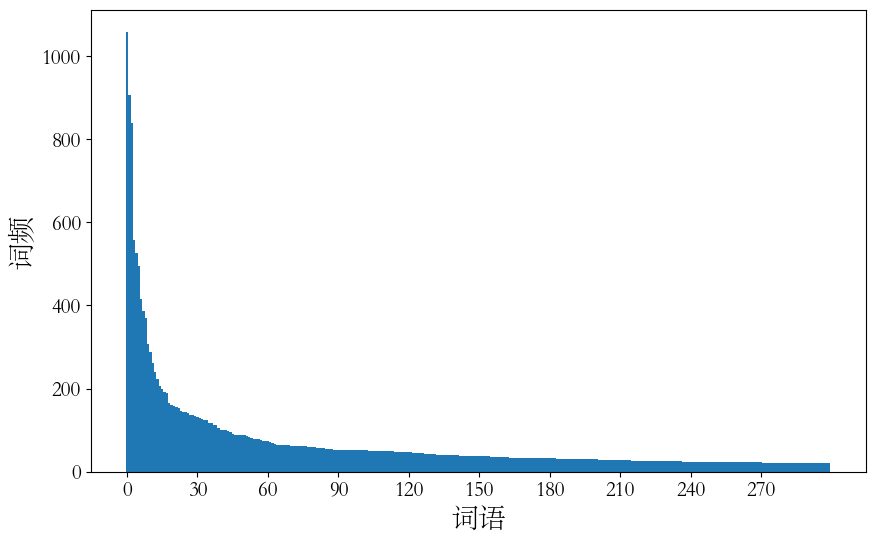

In [25]:
# 可视化词频
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['STsong']
plt.rcParams['axes.unicode_minus'] = False

# 词频排序
# 词频分布图
plt.figure(figsize=(10, 6))
plt.bar(np.arange(300), [each[1] for each in data_noun[0:300]], width=1)
plt.xticks(range(0,300,30),range(0,300,30),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('词语',fontsize=20)
plt.ylabel('词频',fontsize=20)
plt.show()

In [27]:
with open(r'1000条评论_名词_去重.tsv','w',encoding='utf-8') as f:
    for each in data_noun:
        f.write(each[0]+'\n')